# Lab 3: Some more Python, Bernoulli processes, Poisson distribution

Like the previous lab, we want to put all of our imported packages towards the top of the lab in a cell that's easy to run as needed. This way we have access to all the methods we need right from the start.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
print ("Modules Imported!")

Modules Imported!


## Some More on Python:

#### Dictionaries and Classes:

In the first lab we learned about lists, arrays, and tuples. There is yet another sort of grouping of terms and that is a dictionary. It is denoted with curly brackets { } instead of parenthesis ( ) for tuples and brackets [ ] for lists. It is like a list or array but instead of being indexed by the integers 0,1,2,3,4..., a dictionary has a key followed by a value colon followed by a value. So that each value is associated to a given key. Below is a dictionary that has the names of fast food chains as the keys, and the ratings out of 10 as the values.

In [2]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4} #Creates a dictionary
print (Rating.keys()) #Returns an array of the keys
print (Rating['Burger King']) #Returns the value associated with the key 'Burger King'

dict_keys(['Burger King', 'Five Guys', 'Chipotle', 'Panda Express', 'Subway'])
4


There should be two questions that come to your mind when first using the dictionary: What happens if we try to retrieve a value from a key that is not in the dictionary? What happens if the same key appears in the dictionary twice? In response to the first question, if there is no key, python will throw an error. Thus, it is always good to check whether the key is in the dictionary before trying to retrieve a value. 

In [3]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4} #Creates a dictionary
for i in ['Burger King', 'Five Guys', 'Chick-Fil-A'] :   
    print (i,Rating[i]) #Will give an error since 'Chick-Fil-A is not an actual key

Burger King 4
Five Guys 7


KeyError: 'Chick-Fil-A'

In [4]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4} #Creates a dictionary
for i in ['Burger King', 'Five Guys', 'Chick-Fil-A'] :   
    if i in Rating: #First checks if i is a key in the dictionary  
        print (i,Rating[i])

Burger King 4
Five Guys 7


In response to the second question, when we try it below, we find that it takes on the most recent value given to the keyword.

In [5]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4, 'Chipotle': 9} #Creates a dictionary
print (Rating.keys())
print ([Rating[i] for i in Rating.keys()])
print (Rating)

dict_keys(['Burger King', 'Five Guys', 'Chipotle', 'Panda Express', 'Subway'])
[4, 7, 9, 5, 4]
{'Burger King': 4, 'Five Guys': 7, 'Chipotle': 9, 'Panda Express': 5, 'Subway': 4}


We can declare classes in python similarly to that of JAVA. We use the keyword "class" followed by the name of the class and then a colon. Tab indentation remains the same as before so that anything included within the tab of the class is contained within the class. We can include class variables or use the "def" keyword to create class functions. Below is an example of a class.

In [6]:
class Student:
    def __init__(self, name, ID):
        self.n = name
        self.i = ID
    def getName(self):
        return self.n
    def getID(self):
        return self.i

The above code is just an example and won't return anything, but make sure you run it anyway. Like the modules that we imported, if we create a custom class and run it once, then all the other cells in our Python notebook will have access to it. There are a few things that should have stood out to you in the code we just ran. The first is the "__init__" function. It is a version of a constructor method common to object oriented programming languages such as Java, and is what you would use to declare a new instance of your class. Second is the "self" keyword that appears in all of the methods. In order to have access to methods and variables within the class itself, you need to reference the class by using the keyword "self". It's kind of like the "this" keyword in JAVA, but is more explicitly expressed here. Finally, the "__init__" function indicates that in our class we pass two parameters (other than self) which will become instance variables for the instances of the class that we will create.  The code below creates an instance of the Student class.

In [7]:
s = Student("Kevin", "4123")
print (s.getName())
print (s.getID())
print (s.n) 
print (s.i)

Kevin
4123
Kevin
4123


Notice how the instance variables we created were not in fact private, so our get methods are not needed (other than to illustrate how things work, of course).

#### Reading and Writing Files

It is very useful to know how to read and write files in python. So below we will go over some of the basics with I/O. When loading and saving files you can specify the entire filepath, but it is probably much easier to keep the files coordinating to each lab in the same folder and just use relative filepaths. We can write to a text file very easily using the code below. If you were to look in the folder where this ipython notebook file is held, you would see the file below.

In [8]:
#Writes a simple statement to a text file
filepath = 'lab3_simple.txt'
f = open(filepath, 'w') #Opens file. 'w' signifies we want to write to it.  
                        #'w' erases existing file; use 'a' to append to an existing file
f.write('This is a simple example') #Writes to the text file
f.close()
print ('The file has been written')

The file has been written


Likewise we can load the text file back using the following:

In [9]:
filepath = 'lab3_simple.txt' 
f = open(filepath) #Opens the file, default behavior is to read (not write)
print (f.read()) #Reads the text file
f.close()

This is a simple example


This is fairly easy yet, since it's a text file everything we store in it needs to be a string. This becomes a bit of a pain if we would want to store things like a dictionary that describes a random variable. This has a mix of strings, floats, and possibly
 others. While it's easy to get the string of each of these and save them in a text file, it's much harder to load back and then parse through to convert everything into the variables we want. Instead we can use the Python Pickle module. Let's use it to save the dictionary we created above.

In [10]:
grades = {'Bart':75, 'Lisa':98, 'Milhouse':80, 'Nelson':65}

import pickle              # import module first

f = open('gradesdict.pkl', 'wb')   # Pickle file is newly created where foo1.py is
pickle.dump(grades, f)          # dump data to f
f.close()   

In [11]:
filepath = 'lab3_dictionary.pkl'
d = {'one':(1./6,-1),'two':(1./6,5),'three':(1./6,-5),'four':(1./6,1),'five':(1./6,-5),'six':(1./6,1)}
f = open(filepath,'wb')    # The 'wb' is for openning file to be written to in binary mode
pkl.dump(d,f)
f.close()
print ('The file has been written')

The file has been written


Now you should see a .pkl file in the same folder which represents our dictionary. It's a bit less conveniant than a text file however, because it's not exactly readable by an outside program. However, we can load it back and manipulate our dictionary just as before. (Note: Due to the way files are written using pickel, a pickel file written using a Windows computer will be hard to open with a computer using Linux and vice versa)

In [12]:
filepath = 'lab3_dictionary.pkl'
f = open(filepath, 'rb')  # The 'rb' is for openning file to be read in binary mode
d = pkl.load(f)
f.close()
print (d['one'])
print (d['five'][1])

(0.16666666666666666, -1)
-5


It would be nice if we could load in files from csv formats to be able to manipulate them. This can be done through the "csv" module. Along with this lab notebook, there should also be a csv file called SacramentoCrime. This is just a random set of data I found on the internet but is fine for our purposes. It has over 7000 crime logs and each one of those logs has 9 different bits of information. We can load the data in and manipulate it with the following.

Data size: 68265 , Data shape: (7585, 9) 

The following is the list of headers:
['cdatetime' 'address' 'district' 'beat' 'grid' 'crimedescr'
 'ucr_ncic_code' 'latitude' 'longitude'] 

The following is some random data corresponding to the headers
['1/1/2006 2:40' '1415 L ST' '3' '3M        ' '745'
 '211 PC  ROBBERY UNSPECIFIED' '1299' '38.57682477' '-121.4882896']


(-121.7, -121.2, 38.4, 38.7)

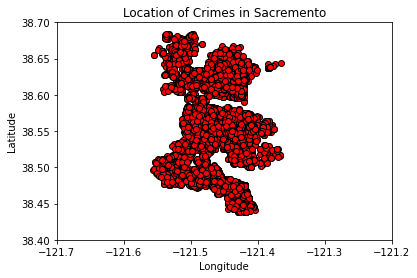

In [13]:
filepath = 'SacramentoCrime.csv'
data = [] #Creates an empty list
f = open(filepath) #Opens the file path in the default 'r' mode
reader = csv.reader(f)
for row in reader:
    data.append(row)
f.close()    # data is now a list of lists
data = np.array(data) #Converts our list to a numpy array to make it a little easier to work with
print ('Data size:', np.size(data), ', Data shape:', np.shape(data),'\n')
print ('The following is the list of headers:')
print (data[0],'\n')
print ('The following is some random data corresponding to the headers')
print (data[77])

N_row = np.shape(data)[0]  # the number of rows in the data matrix

x = [float(a) for a in data[1:N_row, 8]]  # Loads column 8 of data (numbering begins at zero) into x
y = [float(a) for a in data[1:N_row, 7]]  # Loads column 7 of data (numbering begins at zero) into y
                                          # convert string to float fot plotting plot later
plt.scatter(x,y, color = 'red', edgecolor = 'black')
plt.title('Location of Crimes in Sacremento')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis([-121.7,-121.2,38.4,38.7])

Finally we can also load in image files. You should have a file along with this lab called SacramentoMap.png. Make sure that this is also in the same folder as the ipython notebook. We can load and plot the image with the following code. It should look similar to the outline given by our crime map.

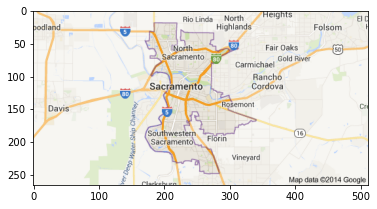

In [14]:
filepath = 'SacramentoMap.png'
sac = img.imread(filepath)
image = plt.imshow(sac)

These were just the basics of file loading and saving. Depending on formatting and other issues, it may be necessary to dive into these modules a bit deeper to better suit your circumstances. However, this is a very good start to being able to use I/O.

#### The Lambda Keyword:

Finally, I use it in one of the topics below so I figured it may be good to go over it first here. "lambda" is a reserved keyword in Python. This may frustrate you when trying to simulate a Poisson process or random variable because in the literature the parameter for a Poisson or exponential distribution is often lambda, $\lambda$, but it's just the way it is. In python, you can pass functions the same as variables. You can set functions equal to variables. The keyword lambda signals the creation of an anonymous function (it's not bound to a name). It allows functions to be written in a single line and to be passed with relative ease. The best way to understand it is just to look at some examples. So here are a few.

In [17]:
# Simple function as we would normally define it
def f(x):
    return x**3

print (f(3))

g = lambda x:x**3 #Same exact function using the lambda keyword
print (g(3))

27
27


In [16]:
# Function that returns a value that is itself a function defined by lambda
def f(n):
    return lambda x:x**n

g = f(3) #g is the function x^3
h = f(2) #h is the function x^2
print (g(3))
print (h(3))

27
9


In [18]:
n = np.arange(20) #Creates a list from 0 to 19
y = list(filter(lambda x:x%2==0,n)) #Filters n. In Python 3.x filter is an iterable object, so converted here to list
print (y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Hopefully this gives you a basic idea of what the lambda function is and does. We will not use it very extensively in this lab, but it's still good to know and may come in handy.

## Bernoulli Processes:

In the first lab, you were introduced to both the Bernoulli distribution and the binomial distribution. A *random process* is simply a collection of random variables indexed by time. A Bernoulli process is given by $X=(X_1,X_2, \ldots)$ where $X_t \sim Bernoulli(p)$ for each $t$ and the $X$'s are mutually independent. It is a sequence of Bernoulli RVs. We can calculate probabilities involving the process at multiple times fairly easily, e.g. $P\{X_3=1,X_6=0,X_{11}=1,X_{13}=1\}=p(1-p)pp=p^3(1-p)$. When considering a random process, it is helpful to visualize, or produce by computer simulation, a typical sample path.   A <I> sample path </I> of a random process is the deterministic function of time that results by performing the probability experiment for the underlying probability space, and selecting a realization, or variate, for each of the random variables invovled.   Generating a sample path of a random process by computer simulation is particularly simple in case the random variables of the process are mutually independent, such as for Bernoulli processes.  For such processes, variates of the individual random variables can be generated separately.  Below is a sample path of a Bernoulli process $X=(X_1,X_2, \ldots)$ with p=1/7.  Run the code several times to see different sample paths.

Text(0.5, 0, 'Time')

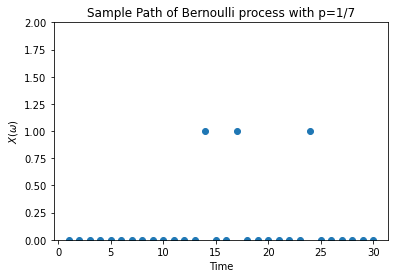

In [19]:
p = 1./7 #Probability
T = 30 #Number of time steps
X = []  #Creates a list for the values of the random variables
for i in range(1,T+1):   #range(1,T+1) is the list of numbers 1 through T
    X.append(st.bernoulli.rvs(p)) #Fills the list with Bernoulli(p) variates
plt.plot(range(1,T+1),X, 'o')
plt.title('Sample Path of Bernoulli process with p=1/7')
plt.ylim((0,2))
plt.ylabel('$X(\omega)$') #You can use LaTex in the Python code
plt.xlabel('Time')

The same Bernoulli process can be described in four different ways.
<html>
    <body>
        <ol>
            <li>  Using $X=(X_1,X_2, \ldots)$ as above.
            <li>  Using $L=(L_1,L_2, \ldots),$  where $L_i$ is the number of trials after the $i-1^{th}$ count up to and including the time of the $i^{th}$ count.
            <li>  Using $S=(S_1,S_2, \ldots),$  where $S_i$ is the time the $i^{th}$ count occurs.
            <li>  Using $C = (C_1,C_2,\ldots)$ where $C_t$ is the number of counts up to and including time $t$
        </ol>
    </body>
</html>
(A diagram of each of these representations can be found in your ECE 313 textbook section 2.6)

For example, if 

$X = 0,1,0,1,0,0,1,1,1,0,1$, then 

$L = 2,2,3,1,1,2$

$S = 2,4,7,8,9,11$

$C = 0,1,1,2,2,2,3,4,5,5,6$.

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Write an expanded version of the code above to display the sample paths of $X,L,S,$ and $C$ all for the same
realization of the experiment.  To do so, plot the sample paths of $X$ and $C$ up to time 30 as before, and print the
first ten values of $L$ and of $S.$ You don't need to plot $L$ and $S.$  You may need to generate more than
30 X values to determine the first ten values of $L$ and $S.$  To reiterate, your values of $L,S$ and $C$ should be determined by $X.$

(If you just generate a large number of trials assuming it will produce at least 10 values of L and S, you may lose a few points. To prevent this way of generation, consider using a while loop.)

list of X: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
list of C: [0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 9, 9, 9, 10]
list of L: [3, 6, 9, 5, 8, 2, 8, 2, 4, 3]
list of S: [3, 9, 18, 23, 31, 33, 41, 43, 47, 50]


<Figure size 432x288 with 0 Axes>

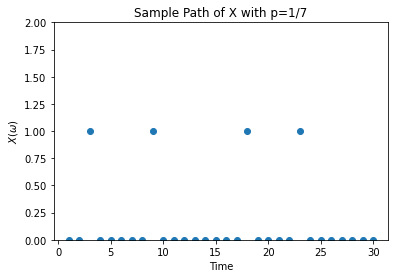

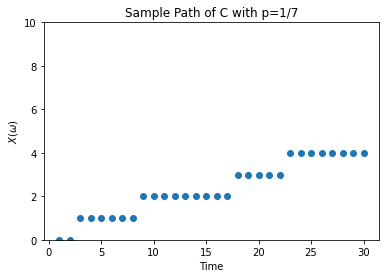

<Figure size 432x288 with 0 Axes>

In [4]:
# Your code here
def get_L(X):
    count = 0
    L = []
    for i in range(len(X)):
        if X[i] != 1:
            count += 1
        else:
            count += 1
            L.append(count)
            count = 0
    return L
def get_S(X):
    S = []
    for i in range(len(X)):
        if X[i] == 1:
            S.append(i+1)
    return S
def get_C(X):
    C = []
    tot = 0
    for i in range(len(X)):
        C.append(tot+X[i])
        tot += X[i]
    return C
p = 1./7 #Probability
T = 30
X = []  #Creates a list for the values of the random variables
count = 0
while count < 10:
    value = st.bernoulli.rvs(p)
    if value == 1:
        count += 1
    X.append(value) #Fills the list with Bernoulli(p) variates
L = get_L(X)
S = get_S(X)
C = get_C(X)
print("list of X:",X)
print("list of C:",C)
print("list of L:",L)
print("list of S:",S)

plt.plot(range(1,T+1),X[:30], 'o')
plt.title('Sample Path of X with p=1/7')
plt.ylim((0,2))
plt.ylabel('$X(\omega)$') #You can use LaTex in the Python code
plt.xlabel('Time')
plt.figure()

plt.plot(range(1,T+1),C[:30], 'o')
plt.title('Sample Path of C with p=1/7')
plt.ylim((0,10))
plt.ylabel('$X(\omega)$') #You can use LaTex in the Python code
plt.xlabel('Time')
plt.figure()



**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

The equivalent descriptions above suggest another method to simulate a Bernoulli random process.    Each $L_i$ has a geometric distribution with parameter $p,$ and the $L$'s are independent. The geometric distribution is given by its pmf: $p(i)=(1-p)^{i-1}p$ for $i\geq 1.$ For example, the probability that the first count occurs on the third trial is $P\{L_1=3\}= P\{X_1=0,X_2=0,X_3=1\}=(1-p)(1-p)p=(1-p)^2p$ which we determined before.  

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Write new code for simulation of a Bernoulli random process by first generating $L=(L_1, \cdots , L_{30})$ according to a geometric distribution and then generating
$X,S,$ and $C$ from $L.$ Print all values in sequences $L$, $X$, $S$ and $C$. 

In [99]:
# Your code here
L = np.random.geometric(p=1./7,size=30)
def get_X(L):
    X = []
    for i in L:
        for j in range(i-1):
            X.append(0)
        X.append(1)
    return X
def get_S(L):
    S = []
    tot = 0
    for i in L:
        tot += i
        S.append(tot)
    return S
def get_C(L):
    C = []
    num = 0
    for i in L:
        for j in range(i-1):
            C.append(num)
        C.append(num+1)
        num += 1
    return C

print("list of L:")
print(L,"\n")
print("list of X:")
print(get_X(L),"\n")
print("list of S:")
print(get_S(L),"\n")
print("list of C:")
print(get_C(L),"\n")

list of L:
[16  2  3  2  3 12 11  2  1 13  6  5  2 11  4  8  7  7 14  2  2 13 13  2
  4  4  6 14  3  1] 

list of X:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1] 

list of S:
[16, 18, 21, 23, 26, 38, 49, 51, 52, 65, 71, 76, 78, 89, 93, 101, 108, 115, 129, 131, 133, 146, 159, 161, 165, 169, 175, 189, 192, 193] 

list of C:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Poisson distribution as limit of binomial distribution

There is yet another important piece to this puzzle, and that is the Poisson distribution. The Poisson distribution has a single parameter $\lambda$ and a probability mass function given by: $p(k) = \frac{e^{-\lambda}\lambda^k}{k!}$ for $k\geq 0.$ The parameter $\lambda$ represents a mean such as the number of hits of a website in one minute, or the number of mispelled words in a document. Thus $p(k)$ represents the probability the number of events occuring is $k$ given that the average number events that occur is $\lambda$. The Poisson distribution is frequently used because it is a good approximation for the binomial distribution when $n$ is large, $p$ is small, and $np \approx \lambda$.  It is simpler than the binomial; it only has one parameter and it doesn't involve binomial coefficients. Let's say you create a website and that your website gets on average of 1200 hits per day. This is set up as a Poisson distribution where $\lambda = 1200$, but we can also model this as a binomial. If we were to break down the day into minute increments then the probability that a hit occurs in any given minute is $p = \frac{1200}{24*60} = \frac{5}{6}$ and there are $n = 24*60 = 1440$ minutes in a day. Below is a graph of this binomial approximation of the Poisson.

p = 0.8333333333333334


&lt;matplotlib.legend.Legend at 0x2ca5f599c40&gt;

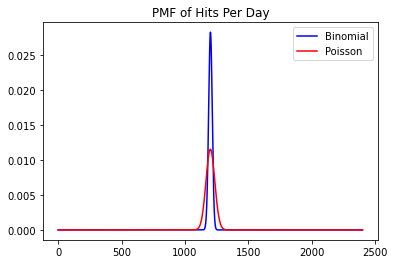

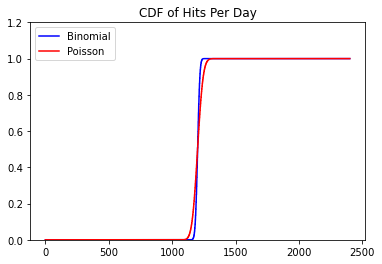

In [51]:
lamb =1200 #Average number of hits per day
n = 60*24. #Number of minutes in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

k = range(2*lamb)
plt.plot(k,st.binom.pmf(k,n,p), 'b', label = 'Binomial')
plt.plot(k,st.poisson.pmf(k,lamb), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,st.binom.cdf(x,n,p), 'b', label = 'Binomial')
plt.plot(x,st.poisson.cdf(x,lamb), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

These two distributions don't really look that close to each other. Why is that? In order for this approximation to be accurate, we require that $n$ be large, $p$ be small, and $np \approx \lambda$. Here $n$ is fairly large but $p$ is not close to zero at all.  The variance of the Poisson(1200) distribution is 1200, while the variance of the Binom(1440,5/6) distribution is only 1440*(5/6)*(1/6)=200. Clearly, we haven't broken the day up into small enough increments.  So let's now break it up into seconds.

p = 0.013888888888888888


&lt;matplotlib.legend.Legend at 0x2ca61f75430&gt;

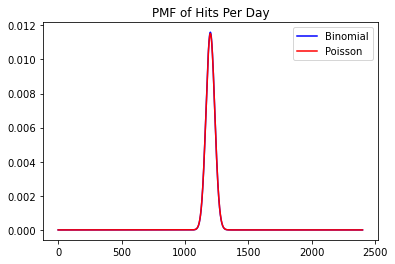

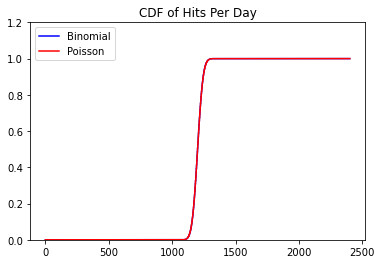

In [52]:
lamb = 1200 #Average number of hits per day
n = 60*60*24. #Number of seconds in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

X = st.binom(n,p)
Y = st.poisson(lamb)

k = range(2*lamb)
plt.plot(k,X.pmf(k), 'b', label = 'Binomial')
plt.plot(k,Y.pmf(k), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,X.cdf(x), 'b', label = 'Binomial')
plt.plot(x,Y.cdf(x), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

Now our approximation is so close that the two distributions are almost indistinguishable from each other. If we kept increasing n and decreasing p we would find that the approximation continues to improve. So, symbolically, $\lim_{n\to \infty, p\to  0, np \to \lambda} Binom(n,p) = Pois(\lambda).$  If you encounter a binomial variable with large $n$ and small $p,$ it may be easier to calculate probabilities based on the Poisson distribution.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** While working on this lab course, I have a probability of $p=.014$ of finishing a section during any given minute. Let's say that there are 300 sections that need to be completed and I have 8 weeks to create the lab (assume I work 40 hours/week). What's the probability that I complete the lab before the start of the semester? Equivalently what is the probability that I finish at least 300 sections? In order to answer this question, do the following:
<html>
    <body>
        <ol>
            <li> Create a binomial variable X to represent the number of sections I complete (for this and other parts of the
            problem, assume I keep working at the same rate if I finish completing 300 sections).</li>
            <li> Create a Poisson variable Y to represent the same number, using the Poisson approximation.
            Make sure to print out what $\lambda$ is.</li>
            <li> Find the probability of my success (i.e. completing at least 300 sections) using the CDFs of each RV. Do they agree?</li>
            <li> Find the probability that I finish exactly 300 sections using the pmf of each RV.  Do they agree? </li>
        </ol>
    </body>
</html>

lambda: 268.8
the probability of my success by binomial distribution0.9726317051770137
the probability of my success by poisson distribution0.9717547225075688
the probability of finishing exactly 300 section by binomial distribution0.003952459184172475
the probability of finishing exactly 300 section by poisson distribution0.004023643874920296


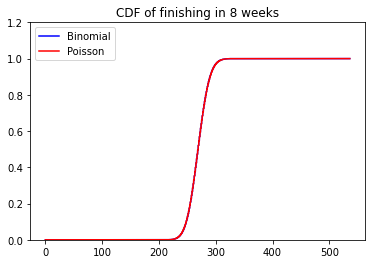

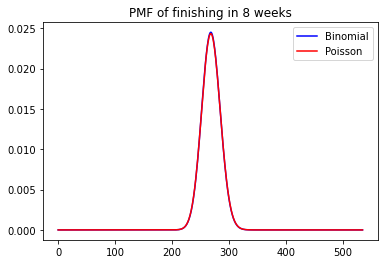

<Figure size 432x288 with 0 Axes>

In [8]:
# Your code here
p = 0.014#probability of finishing a section during any minute
m = 8*40*60#number of minutes in 8 weeks
lamb = p*m
print("lambda:",lamb)
k = 300
X = st.binom(m,p)
Y = st.poisson(lamb)

x = np.linspace(0,2*int(lamb),10000)
plt.plot(x,X.cdf(x), 'b', label = 'Binomial')
plt.plot(x,Y.cdf(x), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of finishing in 8 weeks')
plt.legend()
plt.figure()

y = range(2*int(lamb))
plt.plot(y,X.pmf(y), 'b', label = 'Binomial')
plt.plot(y,Y.pmf(y), 'r', label = 'Poisson')
plt.title('PMF of finishing in 8 weeks')
plt.legend()
plt.figure()

print('the probability of my success by binomial distribution'+str(X.cdf(300)))
print('the probability of my success by poisson distribution'+str(Y.cdf(300)))
print('the probability of finishing exactly 300 section by binomial distribution'+str(X.pmf(300)))
print('the probability of finishing exactly 300 section by poisson distribution'+str(Y.pmf(300)))

__Answer:__ (Your answer here): for both question (3) and (4), using CDF and PMF are the same for binom and poisson

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 